In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None
from kmodes.kmodes import KModes
from sklearn import preprocessing
import itertools

In [4]:
df = pd.read_csv("Rice_quantitative.csv", encoding= 'unicode_escape')

In [5]:
df.head()

,Areas,Company,Crop,Age,Education,Orientation,ID,Use_NY,Product,Used_LY,Product_LY,Company.1,Indication,Region,District,Year,Harvest,Volume_tons,Value_Thsd
0,"0,0 - 0,5 ha",Bayer CS,Rice,51 - 60 years,High school,mixed farm,Farmer 580021203,yes,BAYLUSCIDE 70 WP,yes,BAYLUSCIDE 70 WP,unknown,Molluscicides,Luzon,Cagayan,2017,"Rice, 1st harvest",0.14902,5.04642
1,"0,0 - 0,5 ha",Syngenta,Rice,51 - 60 years,High school,mixed farm,Farmer 580021203,yes,CYMBUSH 5 EC,yes,CYMBUSH 5 EC,Syngenta,Insecticides,Luzon,Cagayan,2017,"Rice, 1st harvest",2.38431,15.91421
2,"0,0 - 0,5 ha",Monsanto,Rice,41 - 50 years,Secondary school,undefined,Farmer 580001107,yes,DIREK 800,yes,DIREK 800,Monsanto,Herbicides,Luzon,Isabela,2016,"Rice, 1st harvest",0.73302,9.92922
3,"0,0 - 0,5 ha",Monsanto,Rice,41 - 50 years,Secondary school,undefined,Farmer 580001107,yes,DIREK 800,yes,DIREK 800,Monsanto,Herbicides,Luzon,Isabela,2016,"Rice, 2nd harvest",0.62918,8.52260
4,"0,0 - 0,5 ha","Cropking Chem., Inc.",Rice,41 - 50 years,Secondary school,undefined,Farmer 580001107,yes,Hit 700 WP,yes,Hit 700 WP,unknown,Molluscicides,Luzon,Isabela,2016,"Rice, 1st harvest",0.57013,22.06490


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [7]:
df_cluster = df[['Areas','Age','Education','Orientation','Region','Value_Thsd','Use_NY','Indication']]

In [8]:
df_cluster.head()

,Areas,Age,Education,Orientation,Region,Value_Thsd,Use_NY,Indication
0,"0,0 - 0,5 ha",51 - 60 years,High school,mixed farm,Luzon,5.04642,yes,Molluscicides
1,"0,0 - 0,5 ha",51 - 60 years,High school,mixed farm,Luzon,15.91421,yes,Insecticides
2,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,9.92922,yes,Herbicides
3,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,8.52260,yes,Herbicides
4,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,22.06490,yes,Molluscicides


In [9]:
df_cluster['Turnover_bin'] = pd.cut(df_cluster['Value_Thsd'], [0,100,200,300,400,500,600,700,800,900],
                                    labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900'] )
df_cluster = df_cluster.drop('Value_Thsd',axis = 1)

In [10]:
df_cluster.head()

,Areas,Age,Education,Orientation,Region,Use_NY,Indication,Turnover_bin
0,"0,0 - 0,5 ha",51 - 60 years,High school,mixed farm,Luzon,yes,Molluscicides,0-100
1,"0,0 - 0,5 ha",51 - 60 years,High school,mixed farm,Luzon,yes,Insecticides,0-100
2,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,yes,Herbicides,0-100
3,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,yes,Herbicides,0-100
4,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,yes,Molluscicides,0-100


In [11]:
df_cluster.describe()

,Areas,Age,Education,Orientation,Region,Use_NY,Indication,Turnover_bin
count,23990,23990,23990,23990,23990,23990,23990,23990
unique,9,5,6,19,3,4,7,9
top,"> 1,0 - 2,0 ha",over 60 years,High school,undefined,Luzon,yes,Insecticides,0-100
freq,5425,7869,7255,8096,9776,21587,12046,23481


In [12]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23990 entries, 0 to 23989
Data columns (total 8 columns):
Areas           23990 non-null object
Age             23990 non-null object
Education       23990 non-null object
Orientation     23990 non-null object
Region          23990 non-null object
Use_NY          23990 non-null object
Indication      23990 non-null object
Turnover_bin    23990 non-null category
dtypes: category(1), object(7)
memory usage: 1.3+ MB


In [13]:
df_cluster.isnull().sum()

Areas           0
Age             0
Education       0
Orientation     0
Region          0
Use_NY          0
Indication      0
Turnover_bin    0
dtype: int64

In [14]:
df_cluster_copy = df_cluster.copy()

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cluster = df_cluster.apply(le.fit_transform)
df_cluster.head()

,Areas,Age,Education,Orientation,Region,Use_NY,Indication,Turnover_bin
0,0,2,0,12,0,3,3,0
1,0,2,0,12,0,3,2,0
2,0,1,4,18,0,3,1,0
3,0,1,4,18,0,3,1,0
4,0,1,4,18,0,3,3,0


In [16]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = 'Cao', verbose=1)
    kmode.fit_predict(df_cluster)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 96385.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 84722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 80063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1531, cost: 75604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2329, cost: 72881.0
Run 1, iteration: 2/100, moves: 461, cost: 72881.0


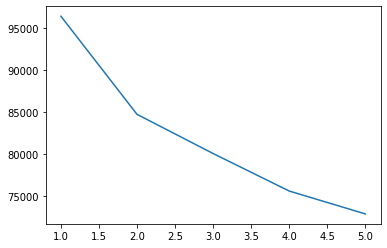

In [17]:
y = np.array([i for i in range(1,6,1)])
plt.plot(y,cost);

In [18]:
km_cao = KModes(n_clusters=2, init = "Cao", verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 84722.0


In [19]:
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [20]:
df_cluster = df_cluster_copy.reset_index()

segment_df = pd.DataFrame(fitClusters_cao)
segment_df.columns = ['segment_predicted']
combined_df = pd.concat([df_cluster, segment_df], axis = 1).reset_index()
combined_df = combined_df.drop(['index', 'level_0'], axis = 1)

In [21]:
combined_df.head()

,Areas,Age,Education,Orientation,Region,Use_NY,Indication,Turnover_bin,segment_predicted
0,"0,0 - 0,5 ha",51 - 60 years,High school,mixed farm,Luzon,yes,Molluscicides,0-100,0
1,"0,0 - 0,5 ha",51 - 60 years,High school,mixed farm,Luzon,yes,Insecticides,0-100,0
2,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,yes,Herbicides,0-100,0
3,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,yes,Herbicides,0-100,0
4,"0,0 - 0,5 ha",41 - 50 years,Secondary school,undefined,Luzon,yes,Molluscicides,0-100,0


In [22]:
cluster_0 = combined_df[combined_df['segment_predicted'] == 0]
cluster_1 = combined_df[combined_df['segment_predicted'] == 1]

In [23]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17047 entries, 0 to 23989
Data columns (total 9 columns):
Areas                17047 non-null object
Age                  17047 non-null object
Education            17047 non-null object
Orientation          17047 non-null object
Region               17047 non-null object
Use_NY               17047 non-null object
Indication           17047 non-null object
Turnover_bin         17047 non-null category
segment_predicted    17047 non-null uint16
dtypes: category(1), object(7), uint16(1)
memory usage: 1.1+ MB


In [24]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6943 entries, 8 to 23974
Data columns (total 9 columns):
Areas                6943 non-null object
Age                  6943 non-null object
Education            6943 non-null object
Orientation          6943 non-null object
Region               6943 non-null object
Use_NY               6943 non-null object
Indication           6943 non-null object
Turnover_bin         6943 non-null category
segment_predicted    6943 non-null uint16
dtypes: category(1), object(7), uint16(1)
memory usage: 454.7+ KB


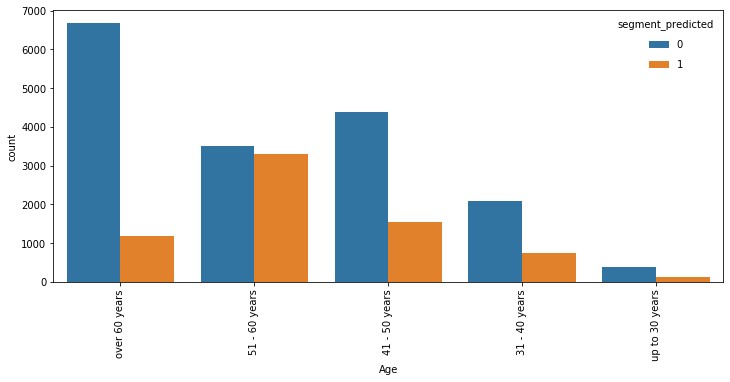

In [25]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Age'],order=combined_df['Age'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

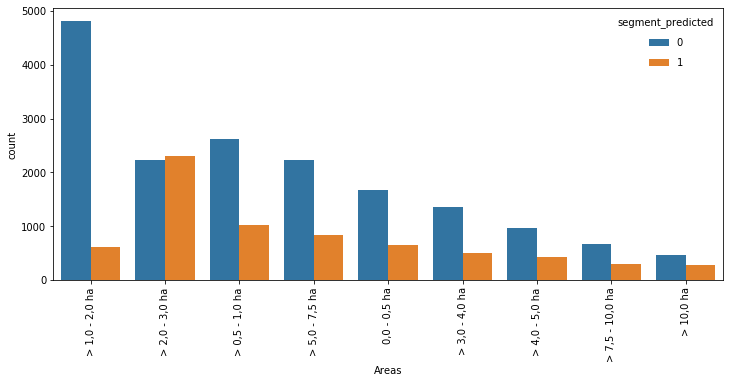

In [24]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Areas'],order=combined_df['Areas'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

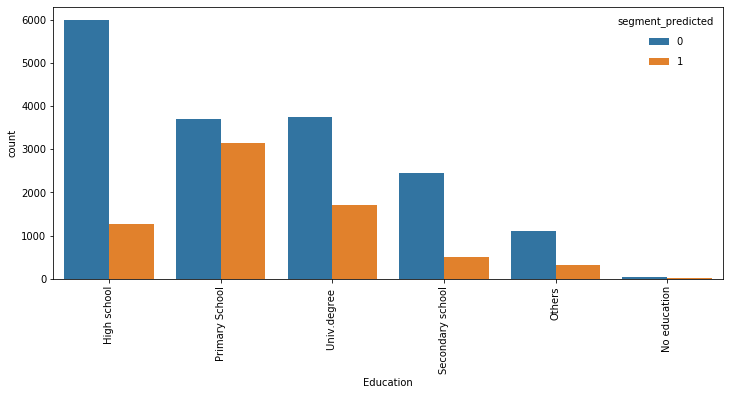

In [25]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Education'],order=combined_df['Education'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

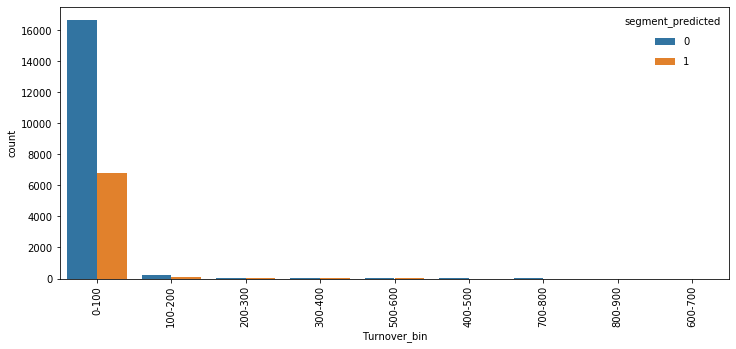

In [26]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Turnover_bin'],order=combined_df['Turnover_bin'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

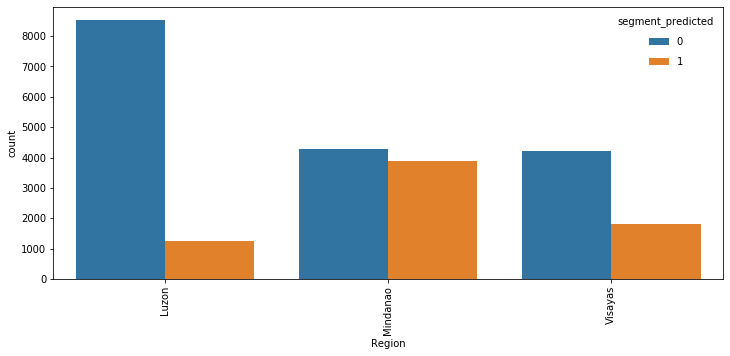

In [27]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Region'],order=combined_df['Region'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

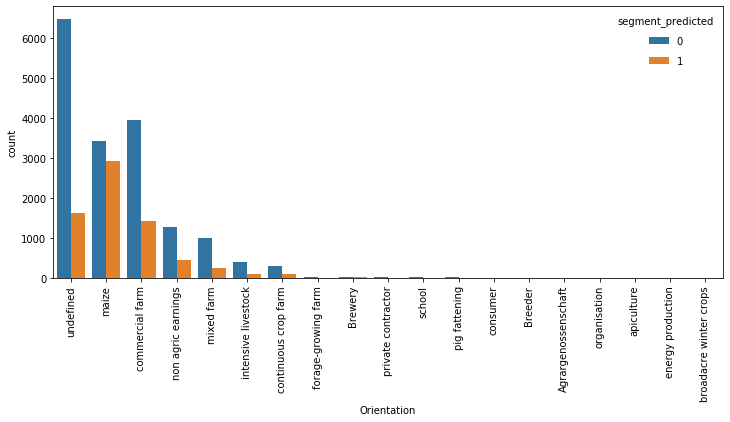

In [28]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Orientation'],order=combined_df['Orientation'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

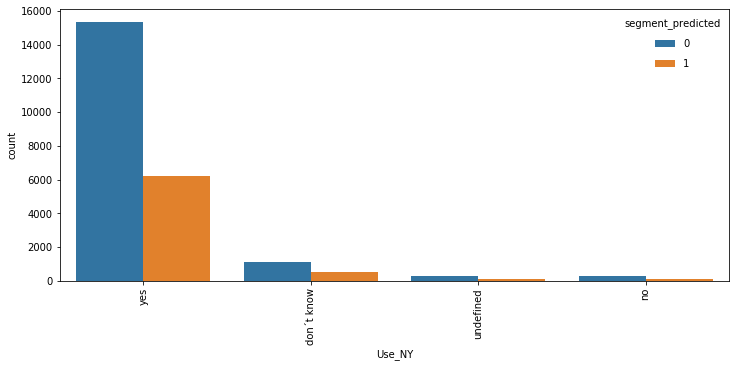

In [29]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Use_NY'],order=combined_df['Use_NY'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();

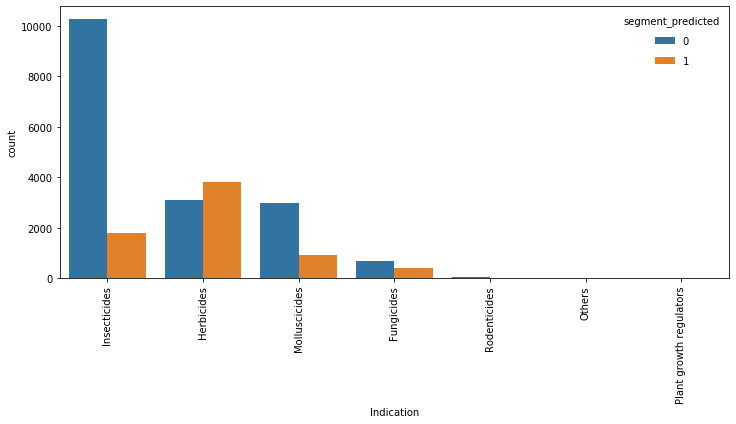

In [30]:
plt.subplots(figsize = (12,5))
sns.countplot(x=combined_df['Indication'],order=combined_df['Indication'].value_counts().index,hue=combined_df['segment_predicted'])
plt.legend(loc='upper right', frameon=False, labelspacing=1, title='segment_predicted')
plt.xticks(rotation=90)
plt.show();